In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
import torch.optim as optim
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error

In [2]:
df_data = pd.read_excel("allprices.xlsx")

In [3]:
df_data.head()

,Date,Aframax-TCE,Brent Oil Price,Industrial Production,Global Oil production (M bpd),Inflation,GDP,Crude oil Price WTI,Baltic Dirty Tanker Index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2008-05-01,42703,110.50,100.3238,86.52,2.26,34935.525635,112.52,1993.0,NaN,NaN,NaN,NaN,NaN
1,2008-05-02,46632,114.56,100.3238,86.52,2.36,34935.525635,116.32,1902.0,NaN,NaN,NaN,NaN,NaN
2,2008-05-06,41785,117.99,100.3238,86.52,2.35,34935.525635,119.97,1965.0,NaN,NaN,NaN,NaN,Thousand barrels per day (MBPD) is equal to 10...
3,2008-05-07,44271,120.31,100.3238,86.52,2.38,34935.525635,121.84,1458.0,NaN,NaN,NaN,NaN,NaN
4,2008-05-08,52069,122.32,100.3238,86.52,2.36,34935.525635,123.53,1538.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_data =df_data.drop(df_data.iloc[:,lambda df_data:[9,10,11,12,13]],axis=1)


In [5]:
df_data.head()

,Date,Aframax-TCE,Brent Oil Price,Industrial Production,Global Oil production (M bpd),Inflation,GDP,Crude oil Price WTI,Baltic Dirty Tanker Index
0,2008-05-01,42703,110.50,100.3238,86.52,2.26,34935.525635,112.52,1993.0
1,2008-05-02,46632,114.56,100.3238,86.52,2.36,34935.525635,116.32,1902.0
2,2008-05-06,41785,117.99,100.3238,86.52,2.35,34935.525635,119.97,1965.0
3,2008-05-07,44271,120.31,100.3238,86.52,2.38,34935.525635,121.84,1458.0
4,2008-05-08,52069,122.32,100.3238,86.52,2.36,34935.525635,123.53,1538.0


In [6]:
df_data.fillna(0,inplace=True)

In [7]:
df_data.isnull().sum()

Date                             0
Aframax-TCE                      0
Brent Oil Price                  0
Industrial Production            0
Global Oil production (M bpd)    0
Inflation                        0
GDP                              0
Crude oil Price WTI              0
Baltic Dirty Tanker Index        0
dtype: int64

In [8]:
df_Aframax = df_data.iloc[:,0:2]
df_Aframax

,Date,Aframax-TCE
0,2008-05-01,42703
1,2008-05-02,46632
2,2008-05-06,41785
3,2008-05-07,44271
4,2008-05-08,52069
...,...,...
2784,2019-06-26,9747
2785,2019-06-27,9326
2786,2019-06-28,8946
2787,2019-07-01,8997


In [9]:
df_Aframax=df_Aframax.set_index('Date')

In [10]:
df_Aframax.shape

(2789, 1)

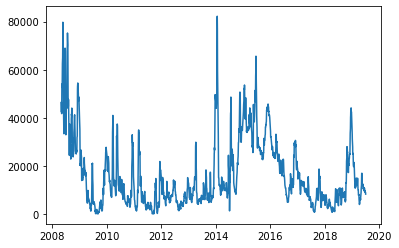

In [11]:
plt.plot(df_Aframax)

In [12]:
scaler = MinMaxScaler(feature_range=(-1,1))
df_Aframax['Aframax-TCE'] = scaler.fit_transform(df_Aframax['Aframax-TCE'].values.reshape(-1,1))
df_Aframax

,Aframax-TCE
Date,
2008-05-01,0.037031
2008-05-02,0.132750
2008-05-06,0.014666
2008-05-07,0.075231
2008-05-08,0.265208
...,...
2019-06-26,-0.765854
2019-06-27,-0.776110
2019-06-28,-0.785368


In [13]:
def sliding_windows(prices, lookback):
    data_raw = prices.to_numpy() # convert to numpy array
    data_x =[]
    data_y=[]
    
    # create all possible sequences of length seq_len
    for i in range(len(data_raw) - lookback): 
        data_x.append(data_raw[i: i + lookback])
        data_y.append(data_raw[i+lookback])
    
    return np.array(data_x),np.array(data_y)
lookback = 30 # choose sequence length
x,y=sliding_windows(df_Aframax,lookback)
print(x.shape)
print(y.shape)

(2759, 30, 1)
(2759, 1)


In [14]:
train_set_size = (0.67*len(x))
test_set_size = len(x) - train_set_size

In [15]:
train_set_size = np.round(int(train_set_size))
test_set_size = np.round(int(test_set_size))
print(train_set_size)
print(test_set_size)

1848
910


In [16]:
x_train = Variable(torch.Tensor(x[0:train_set_size]))
y_train = Variable(torch.Tensor(y[0:train_set_size]))

x_test = Variable(torch.Tensor(x[train_set_size:len(x)]))
y_test = Variable(torch.Tensor(y[train_set_size:len(y)]))






In [17]:
x_train.size()

torch.Size([1848, 30, 1])

In [18]:
#reshape to rows,timestamps and features

#x_train = torch.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))

#x_test = torch.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [19]:
x_train.size()

torch.Size([1848, 30, 1])

In [20]:
class LSTMA(nn.Module):
    def __init__(self,num_output,input_size,hidden_size,num_layers):
        super(LSTMA,self).__init__()
        self.num_output = num_output
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
       
        
        self.lstm = nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.fc_1 = nn.Linear(hidden_size,50)
        self.fc=nn.Linear(50,num_output)
        
        self.relu=nn.ReLU()
        
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) # innternal state
        
        output,(hn,cn) = self.lstm(x,(h_0,c_0)) ##
        hn = hn.view(-1,self.hidden_size) # reshape the data for dense
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out) # final output
        
        return out
        
        
        
    

In [21]:
num_epochs =100
learning_rate = 0.01
input_size = 1 # number of features
hidden_size = 150
num_layers = 1
num_output = 1

lstma = LSTMA(num_output,input_size,hidden_size,num_layers)



In [22]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstma.parameters(),lr=learning_rate)

In [23]:
for epoch in range(num_epochs):
    outputs = lstma.forward(x_train)
    optimizer.zero_grad() # calculate the gradient,setting to 0 
    loss = criterion(outputs,y_train)    
    loss.backward()
    
        
    #if (loss<0.01):
     #   print('Num steps:'+str(epoch))
     #   break
        
    optimizer.step() # i need to check the step() function
    
  
    print("Epoch: %d, loss: %1.5f" % (epoch,loss.item()))

C:\Users\User\anaconda3\lib\site-packages\torch\autograd\__init__.py:173: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:112.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0, loss: 0.49332
Epoch: 1, loss: 0.34693
Epoch: 2, loss: 0.15607
Epoch: 3, loss: 0.24165
Epoch: 4, loss: 0.25042
Epoch: 5, loss: 0.22303
Epoch: 6, loss: 0.17801
Epoch: 7, loss: 0.12270
Epoch: 8, loss: 0.08330
Epoch: 9, loss: 0.15576
Epoch: 10, loss: 0.08132
Epoch: 11, loss: 0.06891
Epoch: 12, loss: 0.07454
Epoch: 13, loss: 0.07483
Epoch: 14, loss: 0.06455
Epoch: 15, loss: 0.04944
Epoch: 16, loss: 0.03897
Epoch: 17, loss: 0.03421
Epoch: 18, loss: 0.02184
Epoch: 19, loss: 0.01758
Epoch: 20, loss: 0.02412
Epoch: 21, loss: 0.01527
Epoch: 22, loss: 0.01869
Epoch: 23, loss: 0.01080
Epoch: 24, loss: 0.01179
Epoch: 25, loss: 0.01289
Epoch: 26, loss: 0.00842
Epoch: 27, loss: 0.00906
Epoch: 28, loss: 0.00948
Epoch: 29, loss: 0.00608
Epoch: 30, loss: 0.00633
Epoch: 31, loss: 0.00698
Epoch: 32, loss: 0.00465
Epoch: 33, loss: 0.00567
Epoch: 34, loss: 0.00587
Epoch: 35, loss: 0.00406
Epoch: 36, loss: 0.00461
Epoch: 37, loss: 0.00435
Epoch: 38, loss: 0.00342
Epoch: 39, loss: 0.00428
Epoch: 40,

In [24]:
dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))



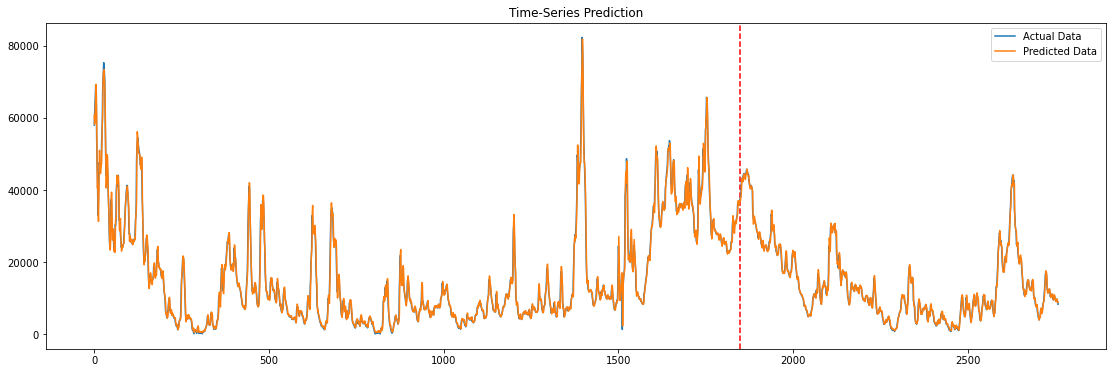

In [25]:
train_predict = lstma(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = scaler.inverse_transform(data_predict) # scaler inverse
dataY_plot = scaler.inverse_transform(dataY_plot)

#df_predict = pd.DataFrame(data_predict)
#df_predict = df_predict.set_index([Date[:-31]])
#df_labels = pd.DataFrame(dataY_plot)
#df_labels = df_labels.set_index([Date[:-31]])

plt.figure(figsize=(19,6))
plt.axvline(x=train_set_size,c='r',linestyle='--')

plt.plot(dataY_plot,label='Actual Data')
plt.plot(data_predict,label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

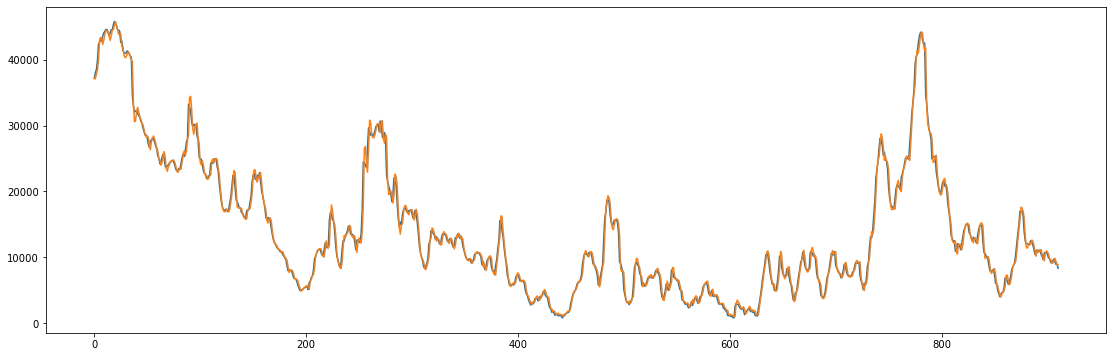

In [26]:
plt.figure(figsize=(19,6))

plt.plot(dataY_plot[-x_test.size()[0]:],label='Actual Data')
plt.plot(data_predict[-x_test.size()[0]:],label='Predicted')
plt.show()